In [1]:
!pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.3.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.6.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [2]:
# importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('intents.json')

In [4]:
df

,intents
0,"{'tag': 'google', 'patterns': ['google', 'sear..."
1,"{'tag': 'greeting', 'patterns': ['Hi there', '..."
2,"{'tag': 'goodbye', 'patterns': ['Bye', 'See yo..."
3,"{'tag': 'thanks', 'patterns': ['Thanks', 'Than..."
4,"{'tag': 'noanswer', 'patterns': [], 'responses..."
5,"{'tag': 'options', 'patterns': ['How you could..."
6,"{'tag': 'jokes', 'patterns': ['Tell me a joke'..."
7,"{'tag': 'Identity', 'patterns': ['Who are you'..."
8,"{'tag': 'datetime', 'patterns': ['What is the ..."
9,"{'tag': 'whatsup', 'patterns': ['Whats up', 'W..."


In [5]:
tag = []
patterns = []
responses = {}
for intent in df['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tag.append(intent['tag'])

In [6]:
data = pd.DataFrame({"inputs": patterns, "tags": tag})

In [7]:
data

,inputs,tags
0,google,google
1,search,google
2,internet,google
3,Hi there,greeting
4,How are you,greeting
...,...,...
132,How many mines are in india?,how-many-mines
133,Number of mines in bharat,how-many-mines
134,Stats related to mines?,how-many-mines
135,statistics related to mines?,how-many-mines


In [8]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd: [ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,google,google
1,search,google
2,internet,google
3,hi there,greeting
4,how are you,greeting
...,...,...
132,how many mines are in india,how-many-mines
133,number of mines in bharat,how-many-mines
134,stats related to mines,how-many-mines
135,statistics related to mines,how-many-mines


In [9]:
# tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

# applying padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

# encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [11]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words: ", vocabulary)
output_length = le.classes_.shape[0]
print ("output length: ", output_length)

number of unique words:  162
output length:  34


In [12]:
# creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

In [13]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [14]:
train = model.fit(x_train, y_train, epochs = 400)

Epoch 1/400
5/5 [==============================] - 2s 6ms/step - loss: 3.5284 - accuracy: 0.0146
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 3.5246 - accuracy: 0.0292
Epoch 3/400
5/5 [==============================] - 0s 5ms/step - loss: 3.5215 - accuracy: 0.0365
Epoch 4/400
5/5 [==============================] - 0s 4ms/step - loss: 3.5186 - accuracy: 0.0657
Epoch 5/400
5/5 [==============================] - 0s 5ms/step - loss: 3.5158 - accuracy: 0.0657
Epoch 6/400
5/5 [==============================] - 0s 4ms/step - loss: 3.5124 - accuracy: 0.0657
Epoch 7/400
5/5 [==============================] - 0s 4ms/step - loss: 3.5088 - accuracy: 0.0657
Epoch 8/400
5/5 [==============================] - 0s 6ms/step - loss: 3.5043 - accuracy: 0.0657
Epoch 9/400
5/5 [==============================] - 0s 6ms/step - loss: 3.4990 - accuracy: 0.0657
Epoch 10/400
5/5 [==============================] - 0s 5ms/step - loss: 3.4930 - accuracy: 0.0657
Epoch 11/400
5/5 [===========

5/5 [==============================] - 0s 4ms/step - loss: 1.7378 - accuracy: 0.6204
Epoch 85/400
5/5 [==============================] - 0s 6ms/step - loss: 1.7116 - accuracy: 0.6423
Epoch 86/400
5/5 [==============================] - 0s 5ms/step - loss: 1.6962 - accuracy: 0.6350
Epoch 87/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6798 - accuracy: 0.6423
Epoch 88/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6635 - accuracy: 0.6496
Epoch 89/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6436 - accuracy: 0.6423
Epoch 90/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6317 - accuracy: 0.6569
Epoch 91/400
5/5 [==============================] - 0s 6ms/step - loss: 1.6137 - accuracy: 0.6569
Epoch 92/400
5/5 [==============================] - 0s 6ms/step - loss: 1.5973 - accuracy: 0.6569
Epoch 93/400
5/5 [==============================] - 0s 5ms/step - loss: 1.5855 - accuracy: 0.6569
Epoch 94/400
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.8405 - accuracy: 0.8613
Epoch 168/400
5/5 [==============================] - 0s 6ms/step - loss: 0.8318 - accuracy: 0.8394
Epoch 169/400
5/5 [==============================] - 0s 4ms/step - loss: 0.8134 - accuracy: 0.8613
Epoch 170/400
5/5 [==============================] - 0s 5ms/step - loss: 0.8230 - accuracy: 0.8832
Epoch 171/400
5/5 [==============================] - 0s 5ms/step - loss: 0.8020 - accuracy: 0.8613
Epoch 172/400
5/5 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.8832
Epoch 173/400
5/5 [==============================] - 0s 4ms/step - loss: 0.7887 - accuracy: 0.8832
Epoch 174/400
5/5 [==============================] - 0s 3ms/step - loss: 0.7827 - accuracy: 0.8832
Epoch 175/400
5/5 [==============================] - 0s 4ms/step - loss: 0.7785 - accuracy: 0.8832
Epoch 176/400
5/5 [==============================] - 0s 5ms/step - loss: 0.7708 - accuracy: 0.8832
Epoch 177/400
5/5 [=====

5/5 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.9051
Epoch 250/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.9270
Epoch 251/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.9270
Epoch 252/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.9124
Epoch 253/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.9124
Epoch 254/400
5/5 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.9124
Epoch 255/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.9270
Epoch 256/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.9197
Epoch 257/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.9270
Epoch 258/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.9124
Epoch 259/400
5/5 [=====

5/5 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.9562
Epoch 332/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9489
Epoch 333/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.9635
Epoch 334/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2680 - accuracy: 0.9708
Epoch 335/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2673 - accuracy: 0.9854
Epoch 336/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.9708
Epoch 337/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.9708
Epoch 338/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.9708
Epoch 339/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.9781
Epoch 340/400
5/5 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.9781
Epoch 341/400
5/5 [=====

<function matplotlib.pyplot.legend(*args, **kwargs)>

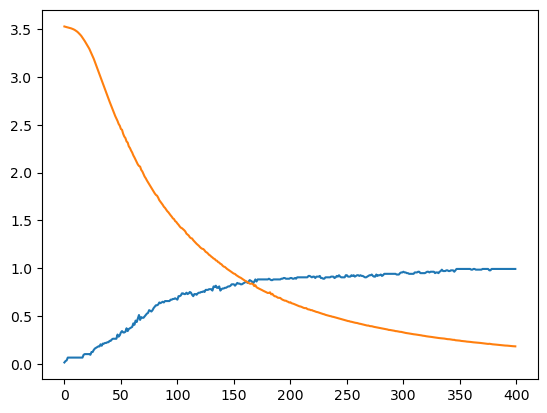

In [15]:
# plotting model accuracy
plt.plot(train.history['accuracy'], label = 'training set accuracy')
plt.plot(train.history['loss'], label = 'training set loss')
plt.legend

In [ ]:
# chatting
import random


while True:
    texts_p = []
    prediction_input = input('You: ')
    
    #removing punctuation and converting to smaller case
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    # tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("KhananSahayak: ", random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break